## Dataset is obtained from Kaggle. Below is the link

### Kaggle link : https://www.kaggle.com/pncnmnp/the-indian-movie-database

In [49]:
%matplotlib notebook


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Problem Statement:

### **Meta has IMDB-id and Movie title and 'Year of Release'
### **Rating has IMDB-id and Rating.

* Across the year which top-5  movie title that got the highest rating (Need to merge 'meta' + 'rating')

* Plot for top-10 movie title with rating across the years. (Need to merge 'meta' + 'rating')

* Top-5 movie highest rating movie across years. (Need to merge 'meta' + 'rating')

* Year wise total votes.(Need to merge 'meta' + 'rating')

# Data Ingestion(Read the Files)

We have to set pd.options.display.max_rows to 5, so that we can read 5 rows at a time.

In [26]:
pd.options.display.max_rows = 20

In [64]:
meta = pd.read_csv("../Desktop/DataSource/IndiaMovieDatabase/2010-2019/bollywood_meta_2010-2019.csv")
ratings = pd.read_csv("../Desktop/DataSource/IndiaMovieDatabase/2010-2019/bollywood_ratings_2010-2019.csv")

In [65]:
meta

,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres
0,tt0073707,Sholay,Sholay,0,1975,198,Action|Adventure|Comedy
1,tt0246825,Om Dar-B-Dar,Om Dar-B-Dar,0,1988,101,Drama
2,tt0403935,Action Jackson,Action Jackson,0,2014,144,Action|Thriller
3,tt0443331,Milenge Milenge,Milenge Milenge,0,2010,109,Drama|Romance
4,tt0839742,Bhopal: A Prayer for Rain,Bhopal: A Prayer for Rain,0,2014,96,Drama
...,...,...,...,...,...,...,...
924,tt9496212,22 Yards,22 Yards,0,2019,126,Sport
925,tt9558612,PM Narendra Modi,PM Narendra Modi,0,2019,136,Biography|Drama
926,tt9574388,Bachche Kachche Sachche,Bachche Kachche Sachche,0,2017,\N,Drama|Short
927,tt9680136,Pati Patni Aur Woh,Pati Patni Aur Woh,0,2019,\N,Comedy|Romance


In [66]:
ratings

,imdb_id,imdb_rating,imdb_votes
0,tt8291224,8.4,35112.0
1,tt9472208,4.1,73.0
2,tt6986710,6.1,5549.0
3,tt8108208,6.0,1891.0
4,tt6028796,7.3,280.0
...,...,...,...
930,tt7997334,0.0,0.0
931,tt4718678,0.0,0.0
932,tt10635372,0.0,0.0
933,tt3482198,0.0,0.0


In [67]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   imdb_id          929 non-null    object
 1   title            929 non-null    object
 2   original_title   929 non-null    object
 3   is_adult         929 non-null    int64 
 4   year_of_release  929 non-null    object
 5   runtime          929 non-null    object
 6   genres           929 non-null    object
dtypes: int64(1), object(6)
memory usage: 50.9+ KB


In [68]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      935 non-null    object 
 1   imdb_rating  922 non-null    float64
 2   imdb_votes   922 non-null    float64
dtypes: float64(2), object(1)
memory usage: 22.0+ KB


# Data Preparation

* Checking missing data, duplicated data - binning, outlier detection and sampling.

In [70]:
print(meta.isnull().sum(), meta.duplicated().sum(), sep="\n\n")

imdb_id            0
title              0
original_title     0
is_adult           0
year_of_release    0
runtime            0
genres             0
dtype: int64

3


* Meta seems to be fine.
* Missing data = 0.
* Duplicated data = 3.

In [71]:
print(ratings.isnull().sum(), ratings.duplicated().sum(), sep="\n\n")

imdb_id         0
imdb_rating    13
imdb_votes     13
dtype: int64

3


* Meta seems to be fine.
* Missing data = 13.
* Duplicated data = 3.

* Checking duplicated data in 'meta' and 'ratings'.

In [72]:
meta[meta.duplicated('imdb_id')==True]

,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres
204,tt1954470,Gangs of Wasseypur,Gangs of Wasseypur,0,2012,321,Action|Comedy|Crime
243,tt2140465,Tanu Weds Manu Returns,Tanu Weds Manu Returns,0,2015,128,Comedy|Drama|Romance
350,tt2424988,Gabbar is Back,Gabbar is Back,0,2015,128,Action


In [76]:
meta[meta["imdb_id"]=="tt1954470"]

,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres
203,tt1954470,Gangs of Wasseypur,Gangs of Wasseypur,0,2012,321,Action|Comedy|Crime
204,tt1954470,Gangs of Wasseypur,Gangs of Wasseypur,0,2012,321,Action|Comedy|Crime


In [77]:
meta[meta["imdb_id"]=="tt2140465"]

,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres
242,tt2140465,Tanu Weds Manu Returns,Tanu Weds Manu Returns,0,2015,128,Comedy|Drama|Romance
243,tt2140465,Tanu Weds Manu Returns,Tanu Weds Manu Returns,0,2015,128,Comedy|Drama|Romance


In [78]:
meta[meta["imdb_id"]=="tt2424988"]

,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres
349,tt2424988,Gabbar is Back,Gabbar is Back,0,2015,128,Action
350,tt2424988,Gabbar is Back,Gabbar is Back,0,2015,128,Action


In [79]:
ratings[ratings.duplicated('imdb_id')==True]

,imdb_id,imdb_rating,imdb_votes
384,tt2424988,7.1,21430.0
388,tt2140465,7.7,24338.0
695,tt1954470,8.2,71636.0


In [82]:
ratings[ratings["imdb_id"]=="tt2424988"]

,imdb_id,imdb_rating,imdb_votes
348,tt2424988,7.1,21430.0
384,tt2424988,7.1,21430.0


In [83]:
ratings[ratings["imdb_id"]=="tt2140465"]

,imdb_id,imdb_rating,imdb_votes
339,tt2140465,7.7,24338.0
388,tt2140465,7.7,24338.0


In [84]:
ratings[ratings["imdb_id"]=="tt1954470"]

,imdb_id,imdb_rating,imdb_votes
688,tt1954470,8.2,71636.0
695,tt1954470,8.2,71636.0


* Removing duplicated data from 'meta' and 'ratings'.

In [86]:
meta = meta.drop_duplicates()
ratings = ratings.drop_duplicates()

In [88]:
meta.duplicated().any(), ratings.duplicated().any() # Checking if any duplicates is there.

(False, False)

* Checking missing values.

In [90]:
print(meta.isnull().sum(), ratings.isnull().sum(), sep="\n\n")

imdb_id            0
title              0
original_title     0
is_adult           0
year_of_release    0
runtime            0
genres             0
dtype: int64

imdb_id         0
imdb_rating    13
imdb_votes     13
dtype: int64


In [98]:
ratings[ratings["imdb_rating"].isnull()]

,imdb_id,imdb_rating,imdb_votes
910,tt7743400,NaN,NaN
911,tt9248934,NaN,NaN
912,tt9172840,NaN,NaN
913,tt8876008,NaN,NaN
914,tt9495690,NaN,NaN
915,tt10196464,NaN,NaN
916,tt10443846,NaN,NaN
917,tt8110330,NaN,NaN
918,tt9680136,NaN,NaN
919,tt8983168,NaN,NaN


In [101]:
ratings = ratings.dropna() # deleting the rows
ratings

,imdb_id,imdb_rating,imdb_votes
0,tt8291224,8.4,35112.0
1,tt9472208,4.1,73.0
2,tt6986710,6.1,5549.0
3,tt8108208,6.0,1891.0
4,tt6028796,7.3,280.0
...,...,...,...
930,tt7997334,0.0,0.0
931,tt4718678,0.0,0.0
932,tt10635372,0.0,0.0
933,tt3482198,0.0,0.0


In [102]:
ratings.isnull().sum()

imdb_id        0
imdb_rating    0
imdb_votes     0
dtype: int64

# Merging 'meta' and 'ratings' dataset

In [103]:
meta_ratings = pd.merge(meta, ratings, how = "inner", left_on="imdb_id", right_on="imdb_id")
meta_ratings

,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes
0,tt0073707,Sholay,Sholay,0,1975,198,Action|Adventure|Comedy,8.2,47924.0
1,tt0246825,Om Dar-B-Dar,Om Dar-B-Dar,0,1988,101,Drama,7.3,280.0
2,tt0403935,Action Jackson,Action Jackson,0,2014,144,Action|Thriller,3.2,2955.0
3,tt0443331,Milenge Milenge,Milenge Milenge,0,2010,109,Drama|Romance,4.1,1606.0
4,tt0839742,Bhopal: A Prayer for Rain,Bhopal: A Prayer for Rain,0,2014,96,Drama,7.2,1860.0
...,...,...,...,...,...,...,...,...,...
908,tt9472208,Battalion 609,Battalion 609,0,2019,131,War,4.1,73.0
909,tt9496212,22 Yards,22 Yards,0,2019,126,Sport,5.3,124.0
910,tt9558612,PM Narendra Modi,PM Narendra Modi,0,2019,136,Biography|Drama,3.3,4484.0
911,tt9574388,Bachche Kachche Sachche,Bachche Kachche Sachche,0,2017,\N,Drama|Short,0.0,0.0


In [105]:
print(meta_ratings.isnull().any(),meta_ratings.duplicated().any(), sep="\n\n" )

imdb_id            False
title              False
original_title     False
is_adult           False
year_of_release    False
runtime            False
genres             False
imdb_rating        False
imdb_votes         False
dtype: bool

False


Checking the details of the merged dataset.

In [106]:
meta_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 912
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   imdb_id          913 non-null    object 
 1   title            913 non-null    object 
 2   original_title   913 non-null    object 
 3   is_adult         913 non-null    int64  
 4   year_of_release  913 non-null    object 
 5   runtime          913 non-null    object 
 6   genres           913 non-null    object 
 7   imdb_rating      913 non-null    float64
 8   imdb_votes       913 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.3+ KB


* Numerical features : "is_adult", "imdb_rating", "imdb_votes"
* Object features : all other features

In [107]:
meta_ratings.describe()

,is_adult,imdb_rating,imdb_votes
count,913.0,913.000000,913.000000
mean,0.0,5.674918,5803.036145
std,0.0,1.595957,12337.024686
min,0.0,0.000000,0.000000
25%,0.0,4.600000,240.000000
50%,0.0,5.700000,1341.000000
75%,0.0,6.900000,5251.000000
max,0.0,9.400000,143605.000000


* Mean of rating : 5.67, min:0.0, max:9.40
* Mean of votes: 5803, min:0.0, max:143605

In [109]:
meta_ratings.describe(include="object")

,imdb_id,title,original_title,year_of_release,runtime,genres
count,913,913,913,913,913,913
unique,913,912,912,16,98,158
top,tt0073707,Ghost,Ghost,2015,\N,Drama
freq,1,2,2,112,46,96


* "Year_of_release": 16 unique -"So like some years are not there as year is from 2010-2019 - 19 years"

In [110]:
meta_ratings["year_of_release"].unique()

array(['1975', '1988', '2014', '2010', '2019', '2012', '2009', '2008',
       '2011', '2013', '\\N', '2017', '2016', '2018', '2015', '1974'],
      dtype=object)

In [ ]:
## Let's check the value "\\N"
## We can do two things get the actual year of the movie and replace the value of the year.
## But we will remove the row in this case.


In [111]:
meta_ratings[meta_ratings["year_of_release"]=="\\N"]

,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes
118,tt1680317,Will You Marry Me,Will You Marry Me,0,\N,\N,Drama,0.0,0.0


In [112]:
# Delete the row
meta_ratings = meta_ratings.drop(index=118)

In [113]:
meta_ratings[meta_ratings["year_of_release"]=="\\N"]# The corresponding row is not there.

,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes


# Now let's check some statistics calculation.

<IPython.core.display.Javascript object>


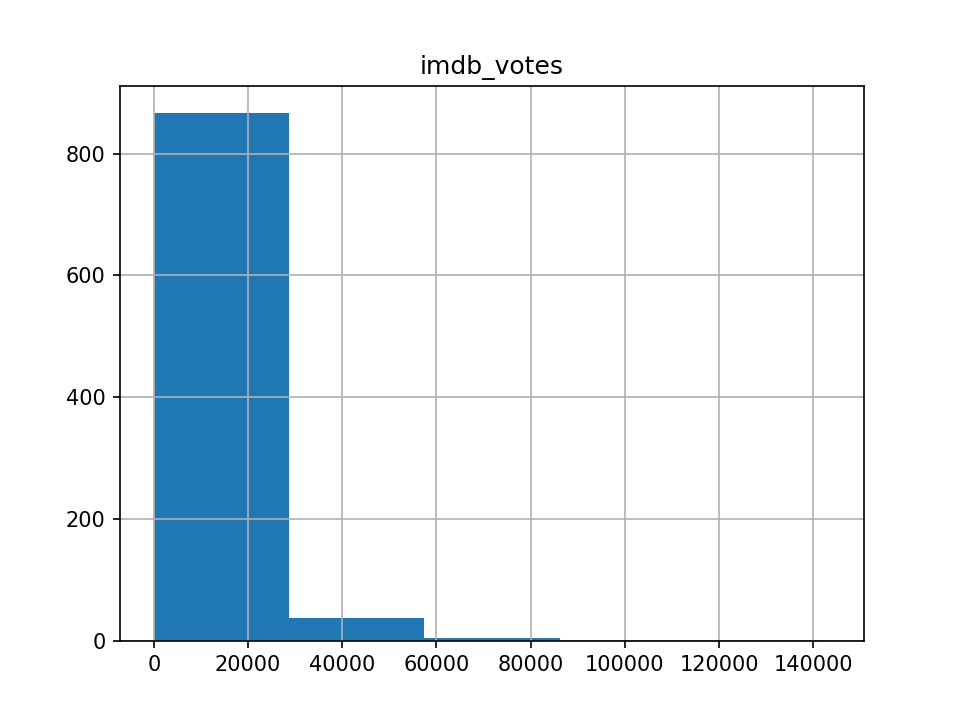

(-143.605, 28721.0]     867
(28721.0, 57442.0]       37
(57442.0, 86163.0]        5
(114884.0, 143605.0]      2
(86163.0, 114884.0]       1
Name: imdb_votes, dtype: int64

In [114]:
Xvotes = pd.cut(meta_ratings["imdb_votes"],5)
meta_ratings.hist("imdb_votes", bins =5)
pd.value_counts(Xvotes)

* Most the votes are in the range 867.
* There are only 37 movies in the range 28 - 57K.
* 3 movies got more than 100K votes.
"""
-143.605, 28721.0]      867
(28721.0, 57442.0]       37
(57442.0, 86163.0]        5
(114884.0, 143605.0]      2
(86163.0, 114884.0]       1

"""

<IPython.core.display.Javascript object>


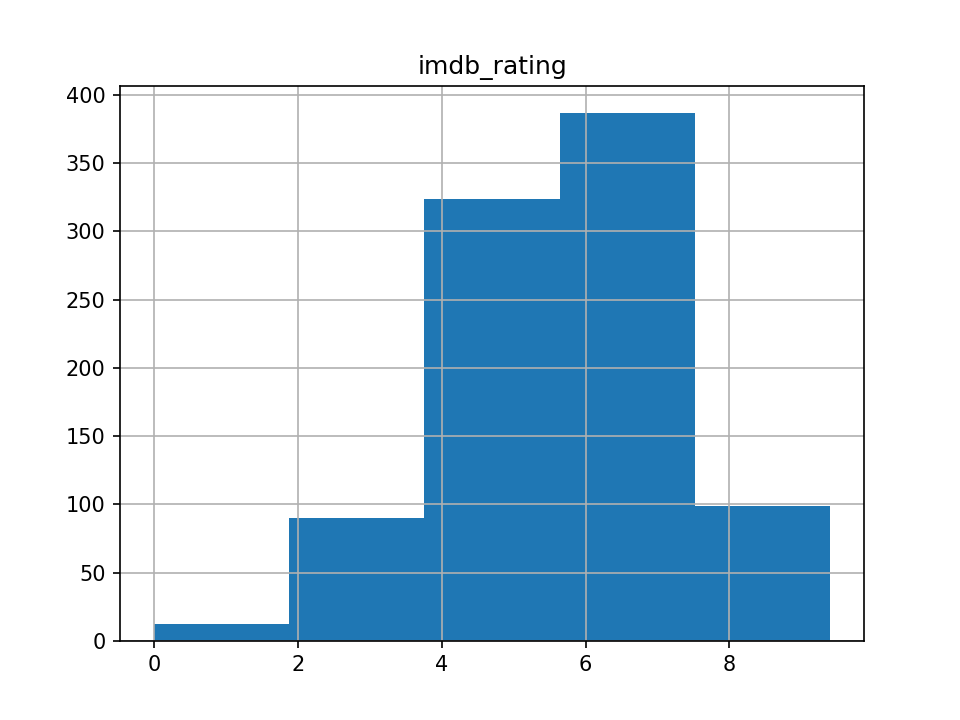

(5.64, 7.52]       387
(3.76, 5.64]       324
(7.52, 9.4]         99
(1.88, 3.76]        90
(-0.0094, 1.88]     12
Name: imdb_rating, dtype: int64

In [115]:
Xratings = pd.cut(meta_ratings["imdb_rating"],5)
meta_ratings.hist("imdb_rating", bins =5)
pd.value_counts(Xratings)

* Most of the ratings are between 3.76 - 7.52
* 99 movies got higher rating between 7.52 - 9.4
* 12 movies got lowest rating between -0.0094 - 1.88
"""
(5.64, 7.52]       387
(3.76, 5.64]       324
(7.52, 9.4]         99
(1.88, 3.76]        90
(-0.0094, 1.88]     12
"""

<IPython.core.display.Javascript object>


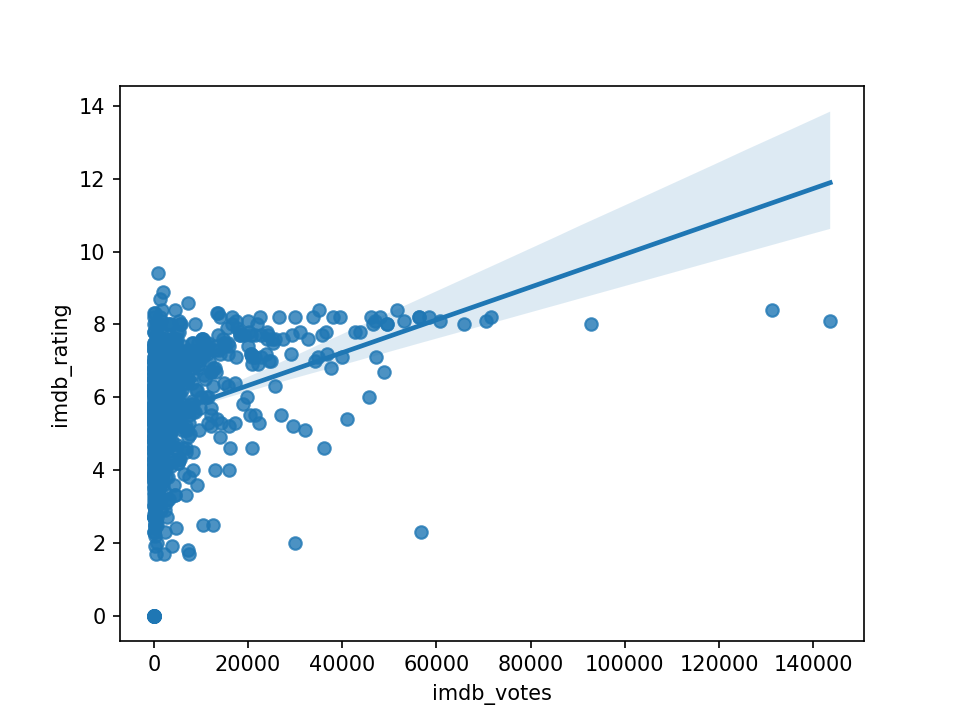

<Axes: xlabel='imdb_votes', ylabel='imdb_rating'>

In [119]:
plt.figure()
sns.regplot(x="imdb_votes",y="imdb_rating", data = meta_ratings)

* There is no relation between rating and votes.
* For a particular votes rating is varying a lot.
* But as per the line, as votes increases rating also increases a bit.

<IPython.core.display.Javascript object>


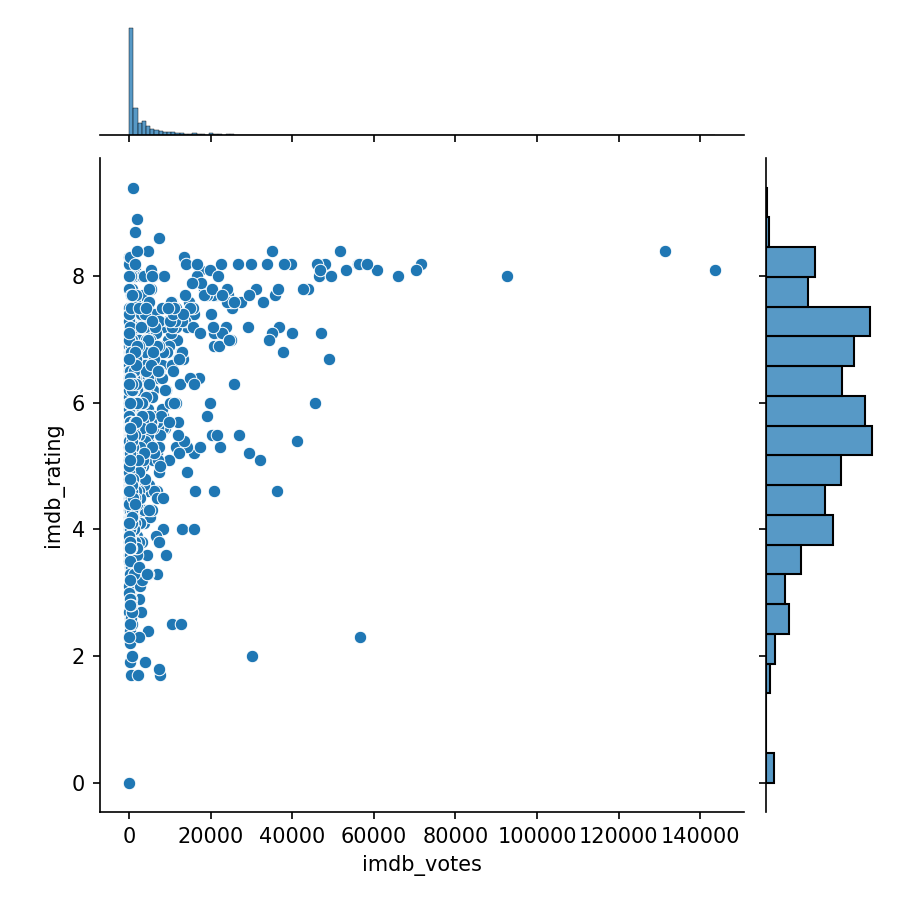

In [121]:
sns.jointplot(x="imdb_votes",y="imdb_rating", data = meta_ratings)

# Which is the top-5 movies of the year that got highest rating?

In [123]:
meta_ratings.sort_values(by="imdb_rating", ascending = False)[:10]

,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes
894,tt8897986,Family of Thakurganj,Family of Thakurganj,0,2019,127,Action|Drama,9.4,895.0
865,tt8108206,Saand Ki Aankh,Saand Ki Aankh,0,2019,146,Biography|Drama,8.9,1902.0
906,tt9378950,Ghost,Ghost,0,2019,130,Horror|Thriller,8.7,1379.0
611,tt4640206,Sachin,Sachin,0,2017,138,Documentary|Sport,8.6,7239.0
871,tt8144834,Section 375,Section 375,0,2019,124,Crime|Drama,8.4,1841.0
879,tt8291224,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112.0
657,tt5074352,Dangal,Dangal,0,2016,161,Action|Biography|Drama,8.4,131338.0
652,tt5005684,Nil Battey Sannata,Nil Battey Sannata,0,2015,100,Drama|Family,8.4,4530.0
862,tt8108198,Andhadhun,Andhadhun,0,2018,139,Crime|Thriller,8.4,51615.0
7,tt10324144,Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417.0


* Family of Thakurganj got the highest rating 9.4 but low votes.
* Dangal got highest votes over 100K but rating is 8.4

<IPython.core.display.Javascript object>


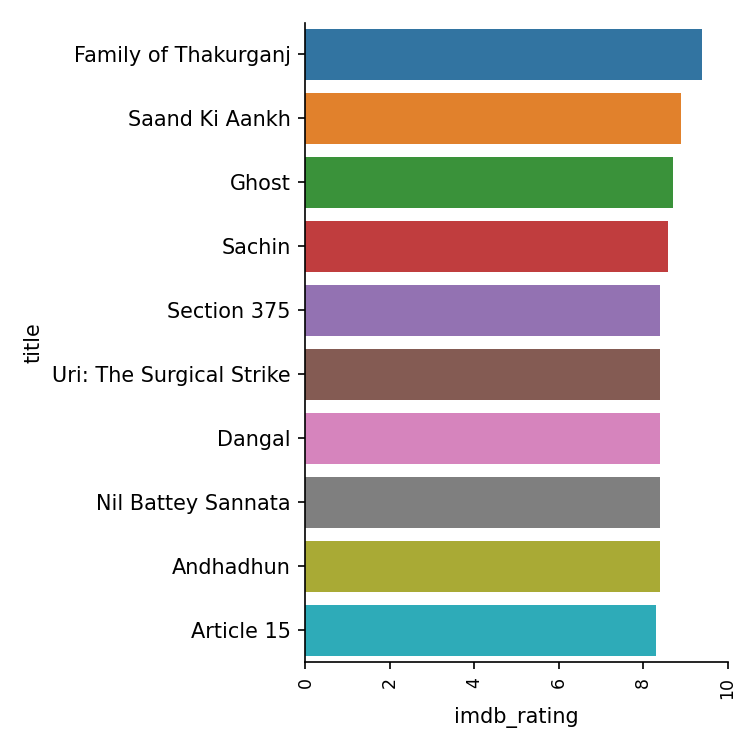

In [127]:
top5rating = meta_ratings.sort_values(by="imdb_rating", ascending = False)[:10]
snstop5ratingplot = sns.catplot(y="title", x="imdb_rating", data=top5rating, kind="bar")
snstop5ratingplot.set_xticklabels(rotation=90, fontsize = "small")

# Top-10 movies that got the highest votes and were most popular.

In [128]:
meta_ratings.sort_values(by="imdb_votes", ascending = False)[:10]

,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes
309,tt2338151,PK,PK,0,2014,153,Comedy|Drama|Fantasy,8.1,143605.0
657,tt5074352,Dangal,Dangal,0,2016,161,Action|Biography|Drama,8.4,131338.0
20,tt1188996,My Name Is Khan,My Name Is Khan,0,2010,165,Drama,8.0,92755.0
201,tt1954470,Gangs of Wasseypur,Gangs of Wasseypur,0,2012,321,Action|Comedy|Crime,8.2,71636.0
227,tt2082197,Barfi!,Barfi!,0,2012,151,Comedy|Drama|Romance,8.1,70443.0
538,tt3863552,Bajrangi Bhaijaan,Bajrangi Bhaijaan,0,2015,163,Action|Comedy|Drama,8.0,65877.0
73,tt1562872,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826.0
586,tt4430212,Drishyam,Drishyam,0,2015,163,Crime|Drama|Mystery,8.2,58340.0
358,tt2574698,Gunday,Gunday,0,2014,152,Action|Drama|Romance,2.3,56670.0
447,tt3322420,Queen,Queen,0,2013,146,Comedy|Drama,8.2,56406.0


<IPython.core.display.Javascript object>


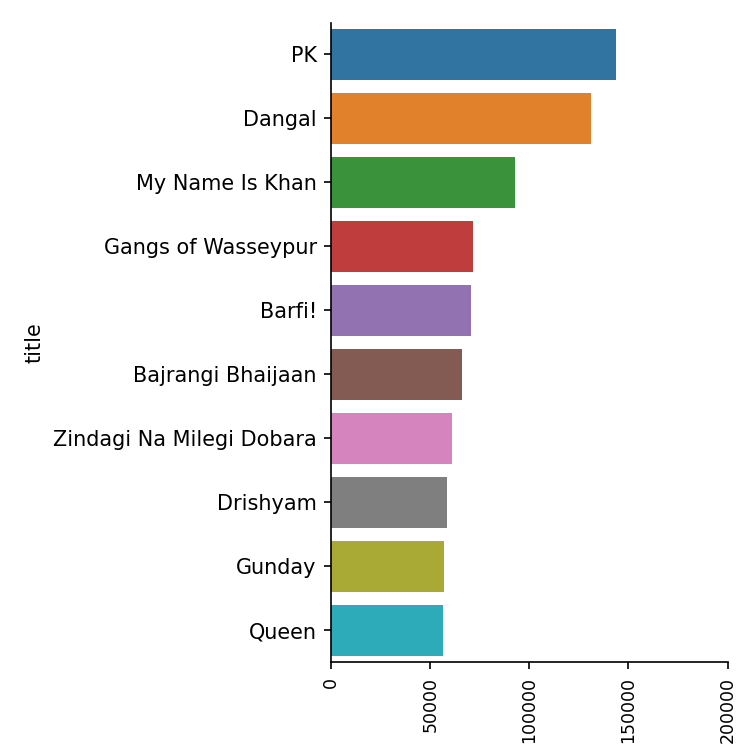

In [129]:
top5voting = meta_ratings.sort_values(by="imdb_votes", ascending = False)[:10]
snstop5votingplot = sns.catplot(y="title", x="imdb_votes", data=top5voting, kind="bar")
snstop5votingplot.set_xticklabels(rotation=90, fontsize = "small")

# Year wise Top-5 rating that got the highest rating.

In [168]:
def sortYearWise(df, colNames):
    return df.sort_values(by = colNames, ascending = False)[:1]

YearWisetop5rating = meta_ratings.groupby("year_of_release").apply(sortYearWise, "imdb_rating")
YearWisetop5rating

,,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes
year_of_release,,,,,,,,,,
1974,296,tt2306635,Love in Bombay,Love in Bombay,0,1974,\N,\N,6.2,20.0
1975,0,tt0073707,Sholay,Sholay,0,1975,198,Action|Adventure|Comedy,8.2,47924.0
1988,1,tt0246825,Om Dar-B-Dar,Om Dar-B-Dar,0,1988,101,Drama,7.3,280.0
2008,128,tt1722425,Antardwand,Antardwand,0,2008,114,Drama,7.4,472.0
2009,57,tt1437367,Thanks Maa,Thanks Maa,0,2009,120,Crime|Drama,8.0,666.0
2010,110,tt1639426,Udaan,Udaan,0,2010,134,Drama,8.2,39567.0
2011,73,tt1562872,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826.0
2012,251,tt2181831,Shahid,Shahid,0,2012,129,Biography|Crime|Drama,8.3,13537.0
2013,447,tt3322420,Queen,Queen,0,2013,146,Comedy|Drama,8.2,56406.0


<IPython.core.display.Javascript object>


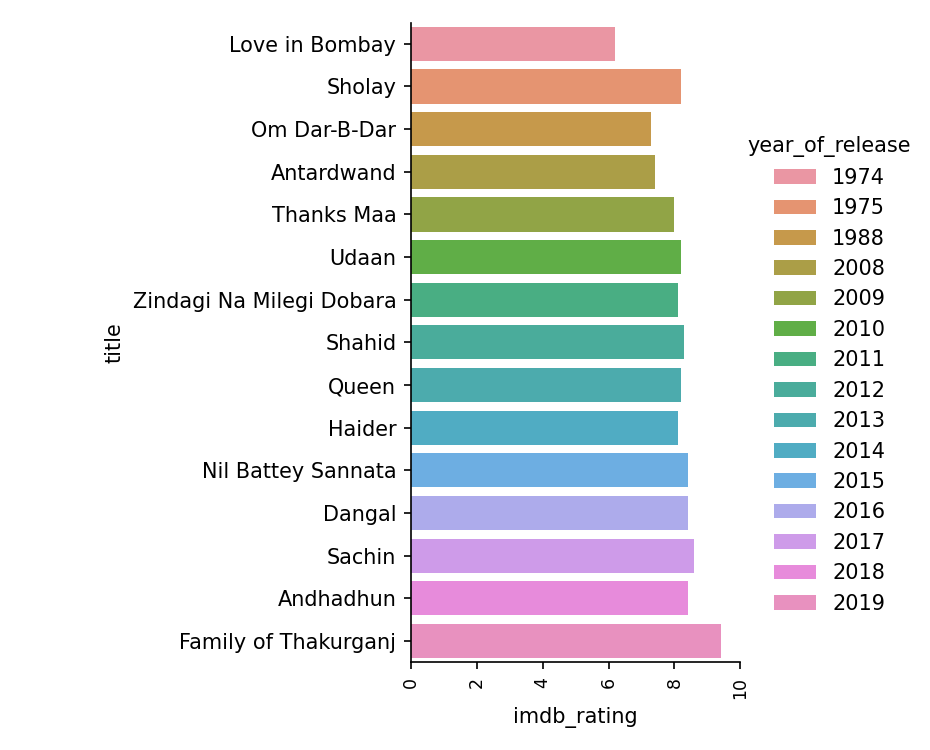

In [169]:
YearWisetop5ratingplot = sns.catplot(y="title", x="imdb_rating",hue="year_of_release", 
                                     data=YearWisetop5rating, kind="bar", dodge=False)
YearWisetop5ratingplot.set_xticklabels(rotation=90, fontsize = "small")

# Year wise Top-5 rating that got the highest voting

In [170]:
def sortYearWise(df, colNames):
    return df.sort_values(by = colNames, ascending = False)[:1]

YearWisetop5votes = meta_ratings.groupby("year_of_release").apply(sortYearWise, "imdb_votes")
YearWisetop5votes

,,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes
year_of_release,,,,,,,,,,
1974,296,tt2306635,Love in Bombay,Love in Bombay,0,1974,\N,\N,6.2,20.0
1975,0,tt0073707,Sholay,Sholay,0,1975,198,Action|Adventure|Comedy,8.2,47924.0
1988,1,tt0246825,Om Dar-B-Dar,Om Dar-B-Dar,0,1988,101,Drama,7.3,280.0
2008,29,tt1239276,Colours of Passion,Rang Rasiya,0,2008,132,Biography|Drama|Romance,7.1,1699.0
2009,53,tt1397492,Well Done Abba!,Well Done Abba!,0,2009,144,Comedy,7.3,1602.0
2010,20,tt1188996,My Name Is Khan,My Name Is Khan,0,2010,165,Drama,8.0,92755.0
2011,73,tt1562872,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826.0
2012,201,tt1954470,Gangs of Wasseypur,Gangs of Wasseypur,0,2012,321,Action|Comedy|Crime,8.2,71636.0
2013,447,tt3322420,Queen,Queen,0,2013,146,Comedy|Drama,8.2,56406.0


<IPython.core.display.Javascript object>


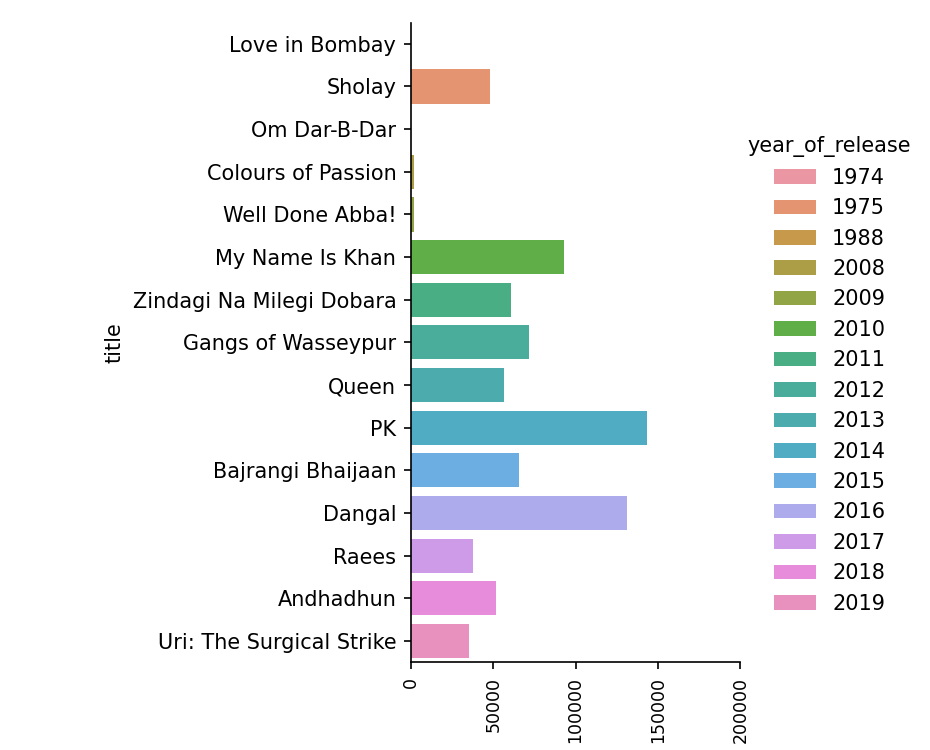

In [171]:
YearWisetop5votingplot = sns.catplot(y="title", x="imdb_votes",hue="year_of_release", 
                                     data=YearWisetop5votes, kind="bar", dodge=False)
YearWisetop5votingplot.set_xticklabels(rotation=90, fontsize = "small")